In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/data_for_exam.xlsx - Sheet1.csv")

df.dropna(inplace=True)

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['cleaned_narrative'] = data['Consumer complaint narrative'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data['cleaned_narrative'])

1    9
0    2
4    2
2    2
3    1
Name: cluster, dtype: int64


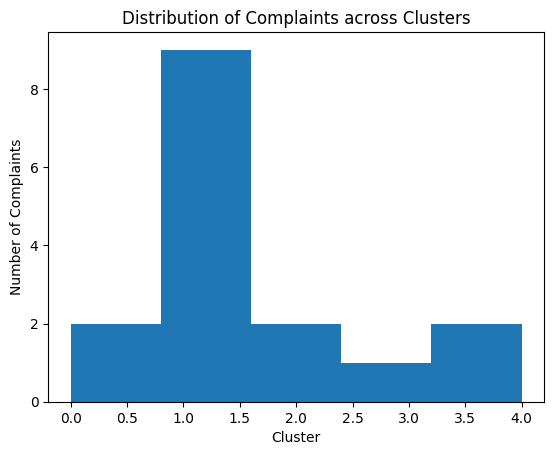

In [5]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

print(data['cluster'].value_counts())

plt.hist(data['cluster'], bins=num_clusters)
plt.xlabel('Cluster')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints across Clusters')
plt.show()